In [1]:
from sklearn.datasets import fetch_openml
minist = fetch_openml('mnist_784',as_frame = False)

In [6]:
minist.details

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'description_version': '2',
 'format': 'ARFF',
 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'],
 'upload_date': '2014-09-29T03:28:38',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://openml.org/data/v1/download/52667/mnist_784.arff',
 'parquet_url': 'https://data.openml.org/datasets/0000/0554/dataset_554.pq',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['Artificial Intelligence',
  'AzurePilot',
  'Computer Vision',
  'Data Sets',
  'Kaggle',
  'Machine Learning',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [7]:
minist.data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
minist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [10]:
print(minist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [11]:
X , y = minist.data , minist.target

(70000,)

In [16]:
import matplotlib.pyplot as plt 

def plot_digitis(img_data):
    imagee = img_data.reshape(28,28)
    plt.imshow(imagee, cmap='binary')
    plt.axis('off')

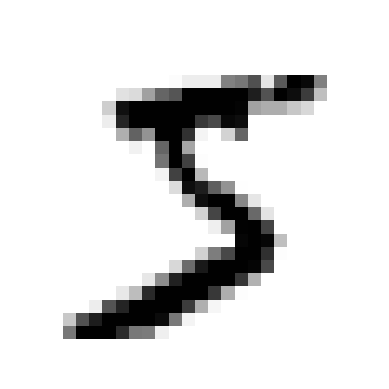

In [17]:
some_digit = X[0]
plot_digitis(some_digit)

In [18]:
y[0]

'5'

In [19]:
x_train , x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [24]:
# training binary classifer'1_minist.ipynb
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [25]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [26]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42)
sgd.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

In [28]:
sgd.predict([some_digit])

array([ True])

In [29]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd, x_train, y_train_5, cv =3 , scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [33]:
from sklearn.dummy import DummyClassifier

dumm = DummyClassifier()
dumm.fit(x_train, y_train_5)
print(any(dumm.predict(x_train)))

False


In [45]:
print(any(dumm.predict(x_train)))


False


In [46]:
cross_val_score(dumm,x_train, y_train_5, cv =3 , scoring='accuracy' )

array([0.90965, 0.90965, 0.90965])

 its nota accuracy tits a precentage of the 5 conatins that i 10% 
# confusion matrix

In [48]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd, x_train, y_train_5, cv=3)

In [54]:
from sklearn.metrics import confusion_matrix, precision_score , recall_score, f1_score
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [53]:
print(precision_score(y_train_5, y_train_pred))
recall_score(y_train_5, y_train_pred) 


0.8370879772350012


0.6511713705958311

In [55]:
f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [56]:
y_score = sgd.decision_function([some_digit])
y_score

array([2164.22030239])

In [58]:
threshold = 0
some_digit_you_pred = (y_score > threshold)
some_digit_you_pred

array([ True])

In [59]:
threshold = 3000
some_digit_you_pred = (y_score > threshold)
some_digit_you_pred

array([False])

Rising the threshold deacrese the reacall , the image actually represents the 5 and classifer detects it when the threshodl is 0 , but miss when the thresold is higher

how to decide wich threshold to use ? by using cross validation just ude the thing 'decision_function' as the method

In [60]:
y_scores = cross_val_predict(sgd, x_train, y_train_5, cv = 3 , method='decision_function')

In [61]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [62]:
from sklearn.metrics import precision_recall_curve

precision , recall , thresholds = precision_recall_curve(y_train_5, y_scores)

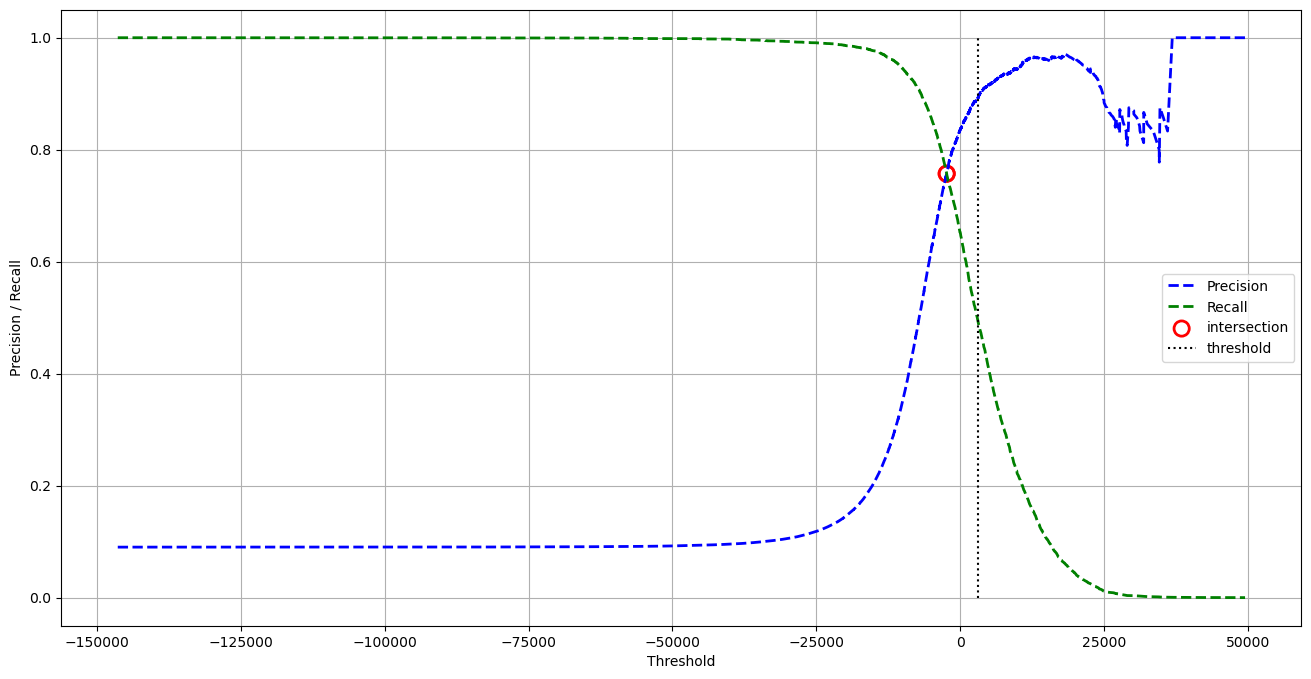

In [74]:
import numpy as np
plt.figure(figsize=(16,8))
plt.plot(thresholds, precision[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recall[:-1], "g--", label="Recall", linewidth=2)

# find approximate intersections and mark them
diff = precision[:-1] - recall[:-1]
ix = np.where(np.sign(diff[:-1]) != np.sign(diff[1:]))[0] + 1  # indices of sign changes
plt.scatter(thresholds[ix], precision[:-1][ix],
            s=120, facecolors='none', edgecolors='red', linewidths=2, label='intersection')

plt.vlines(threshold, 0, 1.0, colors='k', linestyles='dotted', label="threshold")
plt.grid(True)
plt.legend(loc='best')
plt.xlabel('Threshold')
plt.ylabel('Precision / Recall')
plt.show()

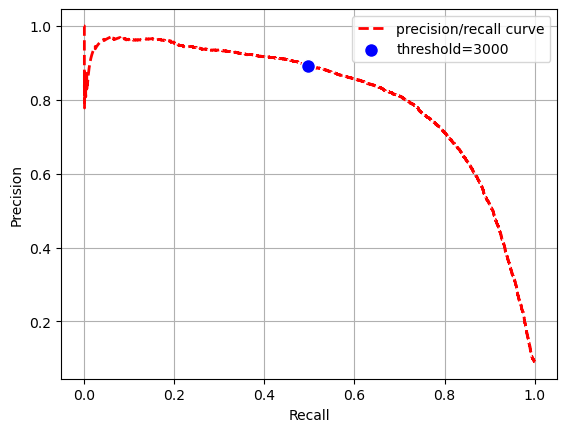

In [85]:
# plot PR curve from right to left and mark the current threshold with a dot
plt.plot(recall[::-1], precision[::-1], 'r--', label="precision/recall curve", linewidth=2)

# find nearest index in thresholds for the chosen threshold and plot a marker
idx = np.searchsorted(thresholds, threshold)
idx = np.clip(idx, 0, len(precision) - 2)  # thresholds aligns with precision[:-1]
plt.scatter(recall[idx], precision[idx], s=100, facecolors='blue', edgecolors='white', zorder=5, label=f"threshold={threshold}")
# plt.vlines(threshold, 0, 1.0, colors='k', linestyles='dotted', label="threshold")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [97]:
idx_for_90_percision = (precision >= .90).argmax()
threshold_4_90_prec = thresholds[idx_for_90_percision]
threshold_4_90_prec

3370.0194991439557

In [98]:
y_train_pred_90 = (y_scores >= threshold_4_90_prec)

In [99]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [100]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90 )
recall_at_90_precision

0.4799852425751706

In [93]:
idx_for_96_percision = (precision >= .96).argmax()
threshold_4_96_prec = thresholds[idx_for_96_percision]
threshold_4_96_prec

11543.33273668999

In [96]:
y_train_pred_96 = (y_scores >= threshold_4_96_prec)
precision_score(y_train_5, y_train_pred_96)

0.9605133267522211

In [101]:
recall_at_96_precision = recall_score(y_train_5, y_train_pred_96 )
recall_at_96_precision

0.1794871794871795

## ROC reciver operationg charetristic 

In [103]:
from sklearn.metrics import roc_curve

fpr , tpr , threshold = roc_curve(y_train_5, y_scores)

In [105]:
idx_for_threshold_at_90 = (threshold <= threshold_4_90_prec).argmax()
tpr_90 , fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

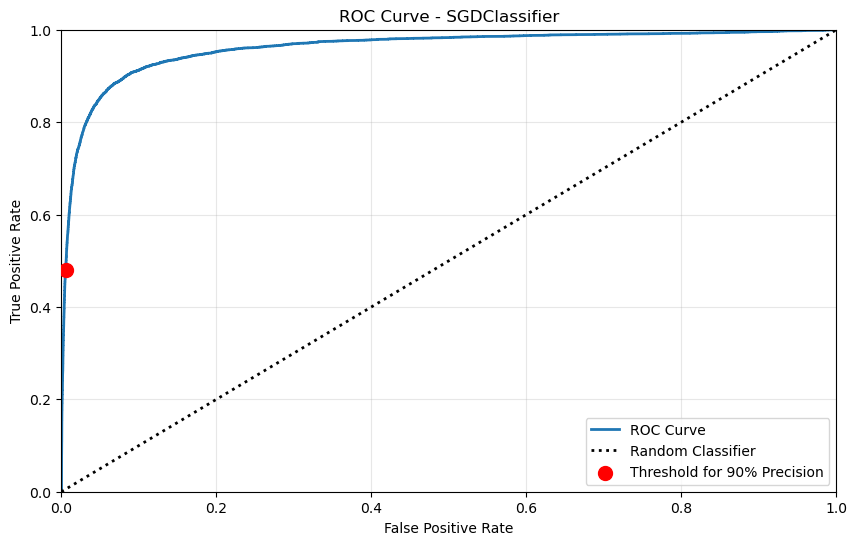

In [111]:
# plt.plot(fpr , tpr, linewidth/ =2 , label="Roc  curv")
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k:', linewidth=2, label='Random Classifier')
plt.scatter([fpr_90], [tpr_90], color='red', s=100, zorder=5, label="Threshold for 90% Precision")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SGDClassifier')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()


In [112]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [113]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42)


In [114]:
y_probs_forest = cross_val_predict(forest, x_train, y_train_5, cv = 3, method='predict_proba')

In [118]:
y_probs_forest[:16]

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.98, 0.02],
       [0.14, 0.86],
       [0.99, 0.01],
       [0.98, 0.02],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [120]:
y_score_forest = y_probs_forest[:, 1]
p_f , r_f, t_f = precision_recall_curve(y_train_5, y_score_forest)

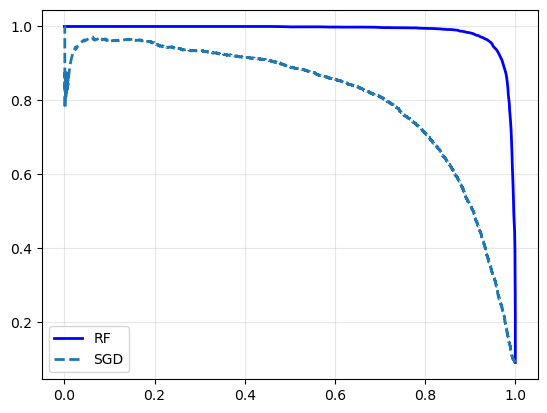

In [128]:
plt.plot(r_f, p_f, 'b-', linewidth=2, label = "RF")
plt.plot(recall, precision, '--', linewidth=2, label = "SGD")
plt.legend(loc='lower left')
plt.grid(True, alpha=0.3)

above observation says that Random forstet curv is bette rthan the SGD cuvr

# Multiclass Clasification

In [131]:
# svc 
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
svm_clf.fit(x_train[:20000], y_train[:20000])

SVC(random_state=42)

In [132]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [134]:
svm_clf.decision_function([some_digit]).round(2)

array([[ 2.74,  2.73,  7.25,  8.31, -0.31,  9.31,  0.72,  2.77,  6.22,
         4.84]])

In [137]:
class_id = svm_clf.decision_function([some_digit]).argmax()


In [138]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [143]:
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(SVC(random_state=42))
ovr.fit(x_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [144]:
ovr.predict([some_digit])

array(['5'], dtype='<U1')

In [147]:
sgd = SGDClassifier(random_state=42)
sgd.fit(x_train, y_train)
sgd.predict([some_digit])

array(['3'], dtype='<U1')

In [148]:
sgd.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [154]:
# cross_val_score(sgd, x_train, y_train, cv=3, scoring='accuracy' )
# array([0.87365, 0.85835, 0.8689 ])


In [ ]:
from sklearn.preprocessing import StandardScaler

sclaer = StandardScaler()
x_train_scaled = sclaer.fit_transform(x_train.astype('float64'))
# cross_val_score(sgd, x_train_scaled, y_train, cv=3, scoring='accuracy' )
# array([0.8983, 0.891 , 0.9018])


array([0.8983, 0.891 , 0.9018])

In [153]:
y_train_pred = cross_val_predict(sgd, x_train_scaled, y_train, cv=3)

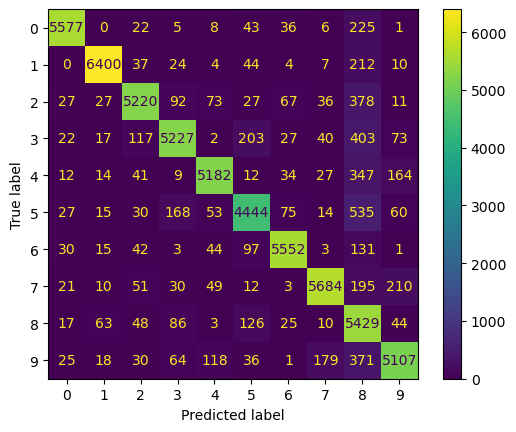

In [155]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

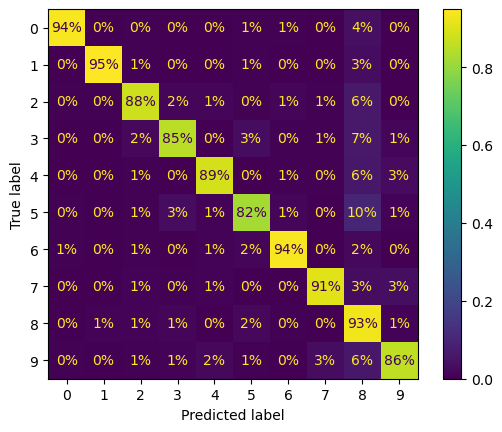

In [156]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize='true', values_format='.0%')
plt.show()

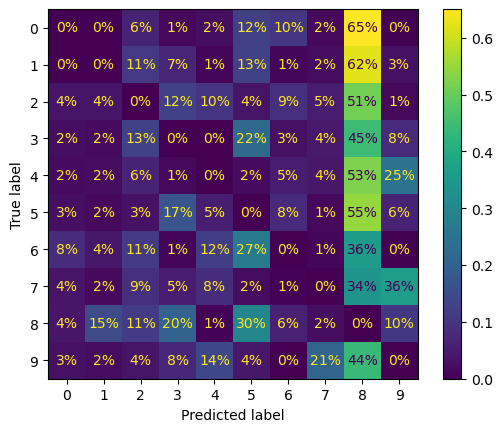

In [157]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize='true', values_format='.0%')
plt.show()

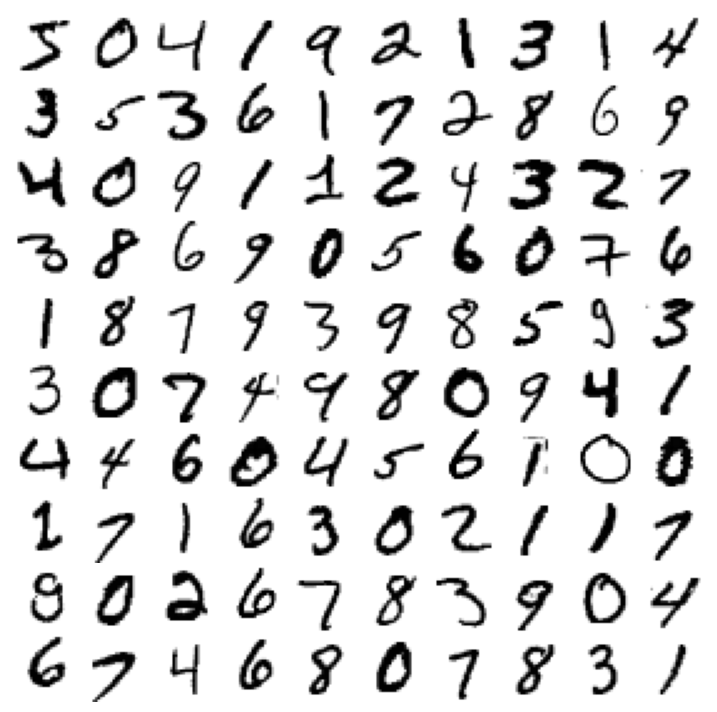

In [160]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digitis(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
# save_fig("more_digits_plot", tight_layout=False)
plt.show()

Text(0.5, 1.0, 'CM normalized by row')

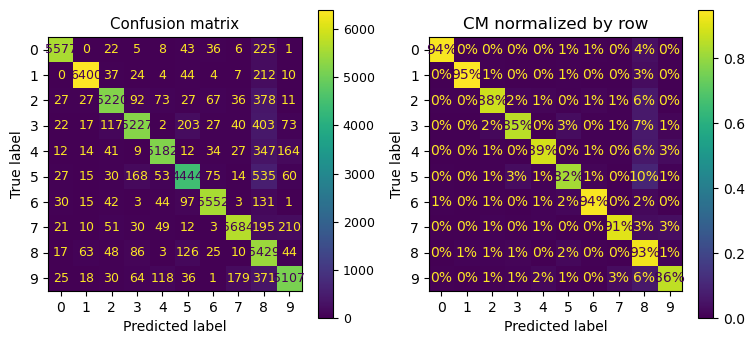

In [162]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")


Text(0.5, 1.0, 'Errors normalized by column')

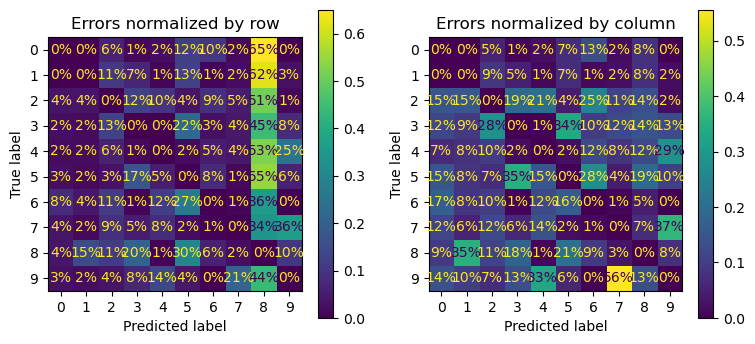

In [163]:
# extra code – this cell generates and saves Figure 3–10
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")

In [165]:
cl_a, cl_b = '3', '5'
X_aa = x_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = x_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = x_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = x_train[(y_train == cl_b) & (y_train_pred == cl_b)]

Text(0, 0.5, 'True label')

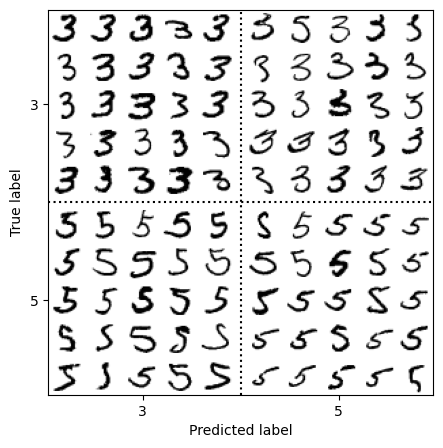

In [167]:
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
